In [82]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Загрузить корпусы данных


In [2]:
split_data = pd.read_csv("split_data_with_sentiments.csv")
X_dict = pd.read_csv("X_dict.csv")
X_bow = pd.read_csv("X_bow.csv")
X_tfidf = pd.read_csv("X_tfidf.csv")

In [3]:
y = split_data["ttype"]

In [4]:
print(split_data.shape)
print(X_dict.shape)
print(X_bow.shape)
print(X_tfidf.shape)

(4992, 5)
(4992, 5)
(4992, 9549)
(4992, 9549)


In [101]:
split_data

,ttext,ttype,clean_text,tokens,sentiments
0,"@noliquid Гм-гм. Все понял. Значит, я не ошибс...",-1,гм гм понять значит ошибиться очень очень грус...,"['гм', 'гм', 'понять', 'значит', 'ошибиться', ...","[0, 0, 1, 0, -1, 0, 0, -1, 0, 0, -1, 0, 1, 0]"
1,"Мой блендер постирал бы лучше, чем наша стирал...",1,блендер постирать наш стиральный машинка новый...,"['блендер', 'постирать', 'наш', 'стиральный', ...","[0, 0, 1, 0, 1, 1, 0]"
2,как дальше жить? как дальше быть? как мне любо...,-1,далёкий жить далёкий любовь твой забыть скучат...,"['далёкий', 'жить', 'далёкий', 'любовь', 'твой...","[0, 0, 0, 1, 0, 0, -1, 1, 1, 1, -1]"
3,"и последняя, Горохова, светленькая..чем-то на ...",-1,последний горохов светленький ромкина юля похожий,"['последний', 'горохов', 'светленький', 'ромки...","[0, 0, 1, 0, 0, 0]"
4,@teryash это было давно и не правда ахаха ну б...,-1,это давно правда ахах блин каждый сериал боль ...,"['это', 'давно', 'правда', 'ахах', 'блин', 'ка...","[0, 0, 0, 0, -1, 0, 0, -1, 0, 0]"
...,...,...,...,...,...
4987,@MaxsYakovenko уууу.если это конфета.то я ее х...,1,уууа это конфета хотеть похожий яблоко карамела,"['уууа', 'это', 'конфета', 'хотеть', 'похожий'...","[0, 0, 0, 0, 0, 0, 0]"
4988,"@DanilaF1re я не знаю, что постить q.q\nМожно ...",1,знать постить просто картинка музыка,"['знать', 'постить', 'просто', 'картинка', 'му...","[0, 0, 0, 0, 0]"
4989,“@Aleks_SPb: Докатились((((\nПолитиком года в ...,-1,“ докатиться политик год питер лидировать рыжи...,"['“', 'докатиться', 'политик', 'год', 'питер',...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, -1, 0, 1, 1]"
4990,"@skochdopol12 через тебе, взагалі-то (((але мо...",-1,ты взагалі але мама довольный,"['ты', 'взагалі', 'але', 'мама', 'довольный']","[0, 0, 0, 0, 1]"


In [103]:
X_dict

,positive,negative,max_positive,max_negative,avg_sentiments
0,2,3,1,-1,-0.071429
1,3,0,1,0,0.428571
2,4,2,1,-1,0.181818
3,1,0,1,0,0.166667
4,0,2,0,-1,-0.200000
...,...,...,...,...,...
4987,0,0,0,0,0.000000
4988,0,0,0,0,0.000000
4989,3,1,1,-1,0.125000
4990,1,0,1,0,0.200000


PCA

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)

In [22]:
X_bow_pca = pca.fit_transform(X_bow)
print(X_bow_pca.shape)

(4992, 5)


In [24]:
X_tfidf_pca = pca.fit_transform(X_tfidf)
print(X_tfidf_pca.shape)

(4992, 5)


In [25]:
X_dict_pca = pca.fit_transform(X_dict)
print(X_dict_pca.shape)

(4992, 5)


Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

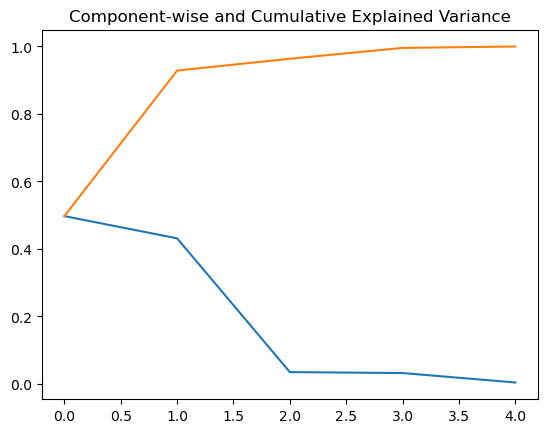

In [84]:
# Visualize
plt.plot(range(5), pca.explained_variance_ratio_)
plt.plot(range(5), np.cumsum(pca.explained_variance_ratio_))
plt.title('Component-wise and Cumulative Explained Variance')

LDA

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [28]:
X_dict_lda = lda.fit_transform(X_dict, y)
X_dict_lda.shape

(4992, 1)

In [29]:
X_bow_lda = lda.fit_transform(X_bow, y)
X_bow_lda.shape

(4992, 1)

In [30]:
X_tfidf_lda = lda.fit_transform(X_tfidf, y)
X_tfidf_lda.shape

(4992, 1)

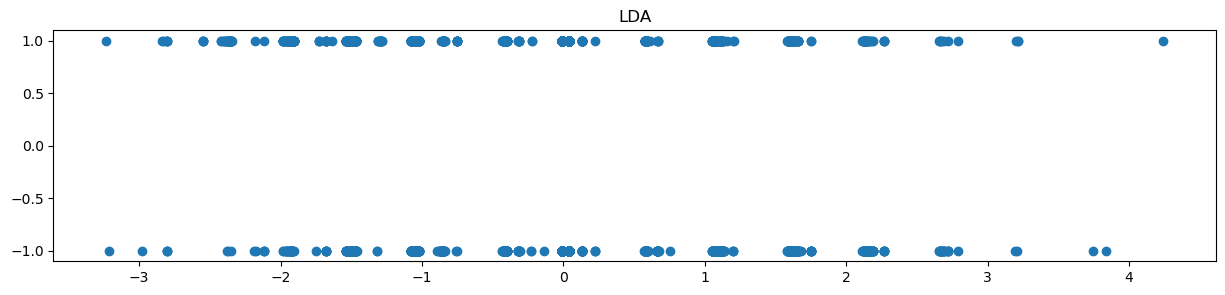

In [109]:
plt.figure(figsize=(15,3))
plt.title('LDA')
plt.scatter(X_dict_lda[:,0],y[:])

KPCA

In [31]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=5, kernel='rbf')

In [32]:
X_dict_kpca = kpca.fit_transform(X_dict)
X_dict_kpca.shape

(4992, 5)

In [33]:
X_bow_kpca = kpca.fit_transform(X_bow)
X_bow_kpca.shape

(4992, 5)

In [34]:
X_tfidf_kpca = kpca.fit_transform(X_tfidf)
X_tfidf_kpca.shape

(4992, 5)

ICA

In [35]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=5)

In [36]:
X_dict_ica = ica.fit_transform(X_dict)
X_dict_ica.shape

(4992, 5)

In [37]:
X_bow_ica = ica.fit_transform(X_bow)
X_bow_ica.shape

(4992, 5)

In [38]:
X_tfidf_ica = ica.fit_transform(X_tfidf)
X_tfidf_ica.shape

(4992, 5)

Factory Analysis

In [39]:
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=2)

In [40]:
X_dict_fa = fa.fit_transform(X_dict)
X_dict_fa.shape

(4992, 2)

In [41]:
X_bow_fa = fa.fit_transform(X_bow)
X_bow_fa.shape

(4992, 2)

In [42]:
X_tfidf_fa = fa.fit_transform(X_tfidf)
X_tfidf_fa.shape

(4992, 2)

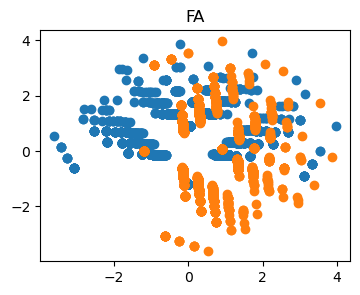

In [111]:
plt.figure(figsize=(4,3))
plt.title('FA')
plt.scatter(X_dict_fa[:,0],X_dict_fa[:,1])
plt.scatter(X_dict_fa[:,1],X_dict_fa[:,0])

tSNE

In [24]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate="auto",init="random")

In [25]:
X_dict_tsne = tsne.fit_transform(X_dict)
X_dict_tsne.shape

(4992, 2)

In [26]:
X_tfidf_tsne = tsne.fit_transform(X_tfidf)
X_tfidf_tsne.shape

(4992, 2)

In [27]:
X_bow_tsne = tsne.fit_transform(X_bow)
X_bow_tsne.shape

(4992, 2)

Isomap

In [76]:
from sklearn.manifold import Isomap
ism = Isomap(n_components = 2, n_neighbors=30)

In [77]:
X_dict_ism = ism.fit_transform(X_dict)
X_dict_ism.shape

C:\Users\nguye\anaconda3\envs\ML_lab\lib\site-packages\sklearn\manifold\_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 36 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\nguye\anaconda3\envs\ML_lab\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\nguye\anaconda3\envs\ML_lab\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\nguye\anaconda3\envs\ML_lab\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(ro

(4992, 2)

In [78]:
X_tfidf_ism = ism.fit_transform(X_tfidf)
X_tfidf_ism.shape

(4992, 2)

In [79]:
X_bow_ism = ism.fit_transform(X_bow)
X_bow_ism.shape

(4992, 2)

LLE

In [58]:
from sklearn.manifold import LocallyLinearEmbedding
embedding = LocallyLinearEmbedding(n_components=2,random_state=42)

In [ ]:
X_dict_emb = embedding.fit_transform(X_dict)
X_dict_emb.shape

In [60]:
X_tfidf_emb = embedding.fit_transform(X_tfidf)
X_tfidf_emb.shape

(4992, 2)

In [61]:
X_bow_emb = embedding.fit_transform(X_bow)
X_bow_emb.shape

(4992, 2)

Найти любой метод выделения признаков, нерассмотренный в лекции. Описать суть метода в отчете, и реализовать в Python

SVD - Dimensionality reduction using truncated SVD

In [71]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 2)

In [72]:
X_tfidf_svd = svd.fit_transform(X_tfidf)
X_tfidf_svd.shape

(4992, 2)

In [73]:
X_bow_svd = svd.fit_transform(X_bow)
X_bow_svd.shape

(4992, 2)

In [75]:
X_dict_svd = svd.fit_transform(X_dict)
X_dict_svd.shape

(4992, 2)